<a href="https://colab.research.google.com/github/Lucasdmnasc/Consultoria-Raizen/blob/main/Data_raizen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
---

# **SME0882 - CONSULTORIA ESTATÍSTICA - GRUPO 4**

<br>

## **FATORES QUE INTERFEREM NA OCORRÊNCIA DE FALHAS EM CANAVIAIS**

<br>

---
---

<br> 

**Integrantes**:

*Júlio Trevisan Centanin*<br>
*Mariana Faria Ribeiro de Souza*<br>
*Lucas Della Montagna do Nascimento*<br>
*Matheus de Tulio*<br>
*Mauricio Florencio de Santana*<br>
*Lucas Roberto O. Lopes*<br>
*Lucas Yuki Okuno*<br>
*Lua Nardi Quito*<br>

<br>

Instituto de Ciências Matemáticas e de Computação - USP


# **Introdução** 

----

Neste problema, estuda-se especificamente as falhas no plantio da cana de açúcar. O fato é que uma vez que o estande de plantas está estabelecido e possui falhas consideráveis, o impacto da produtividade é direto e perpetua-se por vários anos até que se tome uma decisão de reforma da área.
Existem dois tipos de plantio, o mecanizado e semi mecanizado, sendo que a semeação mecanizada é mais rápida, porém gera mais falhas no campo. Tem-se verificado um índice de brotação menor, cerca de 30 pontos percentuais, ocasionando as falhas no canavial. Além de que, considera-se falha no plantio, o intervalo linear maior que 30cm em que há ausência da planta estabelecida.

**Objetivos gerais**

Analisar, via métodos estatísticos, fatores que interferem na ocorrência de falhas em canaviais apontando direções no sentido de minimizá-las. Além disso, utilizar modelagem matemática para antecipar eventos de falha, compreender suas falhas e gerenciar os riscos envolvidos nesse processo.

**Objetivos específicos**

*   Verificar fatores que influenciam no aumento de falhas do plantio de cana de açúcar;
*   Ajustar modelos estatísticos para a predição do percentual de falha no plantio.
----

---
# **0 - Bibliotecas**
---

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Manupulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Processamento pré modelagem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelagem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import lightgbm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from statsmodels.othermod.betareg import BetaModel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Para transformar dados em data
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
# **1 - Leitura dos dados e breves manipulações**
---




In [ ]:
# Leitura do conjunto de dados.
df = pd.read_csv("raizen_fazenda_zona_talhao.csv", sep=';')
df_original = df.copy()

# Dimensão do conjunto de dados
print("Número de observações: {}".format(df.shape[0]), "\nNúmero de variáveis: {}".format(df.shape[1]))

# Vizualização das cinco primeiras observações.
df.head()

Número de observações: 2749 
Número de variáveis: 49


,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,dia,mes,ano,Fazenda,Zona,Talhao
0,8.72,0.0086,0.0,18M,1.0,12,15,6.0,RB855156,1o. Corte - 18 Meses,...,0.750,18.405,87.40,121.375,17,3,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,be3c152f6f6bcd5f85f9e4cba49b1e48
1,7.88,0.0280,0.0,18M,1.0,12,15,6.0,RB855156,Cana Planta - 18 m,...,1.100,15.220,62.35,98.150,23,7,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,9d08099943f8627959cfb8ecee0d2f5d
2,4.24,0.0014,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,1.100,13.955,58.70,69.660,11,7,2016,b5ccb3e35c52f544963d0754ca443df5,7d919225f11eb7af31bf9600b63a7a98,71db8a6cad03244e6e50f0ad8bc95a65
3,5.29,0.3009,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.465,10.480,119.70,54.700,28,5,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,06cd248dd1409b804444bd9ad5533d1d
4,3.49,0.0438,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.450,10.245,67.85,54.450,5,7,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,e03a89536262b6a0e2beabd90a841c43


In [ ]:
# Construção da variável data.
data = []
for i in range(df.shape[0]):
  dia = str(df["dia"][i])
  mes = str(df["mes"][i])
  ano = str(df["ano"][i])
  aux = datetime.strptime("{}/{}/{}".format(dia, mes, ano), "%d/%m/%Y")
  data.append(aux.strftime("%d/%m/%Y"))

df["data"] = data
# Passa a variável de string para datetime
df["data"] = pd.to_datetime(df["data"])

# Exclui as variáveis dia, mes e ano por serem reduntantes por conta da variável data.
df.drop(["dia", "mes", "ano"], axis = 1, inplace = True)

df.head()

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,Fazenda,Zona,Talhao,data
0,8.72,0.0086,0.0,18M,1.0,12,15,6.0,RB855156,1o. Corte - 18 Meses,...,94.800,44.665,0.750,18.405,87.40,121.375,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,be3c152f6f6bcd5f85f9e4cba49b1e48,2016-03-17
1,7.88,0.0280,0.0,18M,1.0,12,15,6.0,RB855156,Cana Planta - 18 m,...,92.270,37.930,1.100,15.220,62.35,98.150,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,9d08099943f8627959cfb8ecee0d2f5d,2016-07-23
2,4.24,0.0014,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,98.775,54.425,1.100,13.955,58.70,69.660,b5ccb3e35c52f544963d0754ca443df5,7d919225f11eb7af31bf9600b63a7a98,71db8a6cad03244e6e50f0ad8bc95a65,2016-11-07
3,5.29,0.3009,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,99.840,57.685,0.465,10.480,119.70,54.700,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,06cd248dd1409b804444bd9ad5533d1d,2016-05-28
4,3.49,0.0438,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,99.075,48.925,0.450,10.245,67.85,54.450,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,e03a89536262b6a0e2beabd90a841c43,2016-05-07


In [ ]:
# Visualização dos ciclos presentes no dataset.
print("Ciclos da cana de açúcar presentes no dataset:", "\n", np.unique(df["Ciclo"]), "\n")

# Visualização dos estagios de plantio presentes no dataset.
print("Estágio da cana de açúcar presentes no dataset:", "\n", np.unique(df["Estagio"]), "\n")

# Vizualização das variedades de cana de açucar
print("Variedades da cana de açúcar presentes no dataset:", "\n", np.unique(df["Variedade"]))

Ciclos da cana de açúcar presentes no dataset: 
 ['18M' 'Ano' 'Inverno'] 

Estágio da cana de açúcar presentes no dataset: 
 ['1o. Corte - 18 Meses' '1o. Corte-12M Inv.' '2o. Corte' '6o. Corte'
 'Cana Planta - 18 m' 'Descanso' 'Passagem'] 

Variedades da cana de açúcar presentes no dataset: 
 ['CT00-1479' 'CTC11' 'CTC4' 'CTC9001' 'CTC9002' 'CTC9003' 'CTC9004'
 'CV0470' 'CV0618' 'CV6654' 'CV6984' 'CV7870' 'IACSP95-5000' 'RB785148'
 'RB855046' 'RB855156' 'RB855536' 'RB867515' 'RB92579' 'RB966928'
 'RB975201' 'RB975952' 'RB985476' 'SP80-3280']


In [ ]:
# Contagem de observações por fazenda
df['Fazenda'].value_counts()

aa4393fa1881daf8c380786836091e8b    107
fc2016ec12d5ada90958207d300357d3    105
146dd2b491238e1180e7af3a912206c1     69
482e6753c23d611b8b25e9d5642db5ea     68
89a2fd2905d9dc59b9664de3ed6482ee     66
                                   ... 
b90b447878207b7915070f0b6969aa45      1
14fcb63333f57878c133e81609a94bf8      1
0c37432b991b9060868fe8b919e5b978      1
24a5bdc15ed21a744a3505f05dcf559d      1
8e0f8ced3d206134adc28b0907635acc      1
Name: Fazenda, Length: 277, dtype: int64

Nota-se que há fazendas com uma unica observação, portanto, para melhorar as análises futuras via agrupamento, opta-se por ficar com as fazendas que possuem pelo menos 10 observações ao longo do tempo.

In [ ]:
# Agrupa as fazendas com mais de 9 observações
df = df.groupby("Fazenda").filter(lambda x: len(x) > 9)
df.reset_index(drop = True, inplace = True)

In [ ]:
# Dimensão do conjunto de dados
print("Número de observações: {}".format(df.shape[0]), "\nNúmero de variáveis: {}".format(df.shape[1]))

# Vizualização das cinco primeiras observações.
df.head()

Número de observações: 1954 
Número de variáveis: 47


,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,Fazenda,Zona,Talhao,data
0,7.41,0.0014,0.0,Ano,1.0,5,13,2.0,CTC9001,Descanso,...,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,4b5630ee914e848e8d07221556b0a2fb,4b5630ee914e848e8d07221556b0a2fb,2016-01-12
1,4.14,0.0018,0.0,Ano,1.0,12,15,2.0,RB966928,Cana Planta - 18 m,...,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,4b5630ee914e848e8d07221556b0a2fb,71db8a6cad03244e6e50f0ad8bc95a65,2016-02-12
2,9.32,0.0013,0.0,Ano,1.0,12,15,2.0,RB966928,Cana Planta - 18 m,...,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,4b5630ee914e848e8d07221556b0a2fb,8f3571abef23f6aca0f7b8666a74e7e0,2016-03-12
3,5.78,0.0009,0.0,Ano,1.0,12,15,2.0,RB966928,Cana Planta - 18 m,...,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,4b5630ee914e848e8d07221556b0a2fb,fa5a4df7ac0f9782037da890557fd8b8,2016-02-12
4,1.63,0.0002,0.0,Ano,1.0,12,15,2.0,RB966928,Descanso,...,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,4b5630ee914e848e8d07221556b0a2fb,8ae1ac7bdf62dca7c19b427a9153445c,2016-01-12


---

# **2 - Análise exploratória de dados**
---


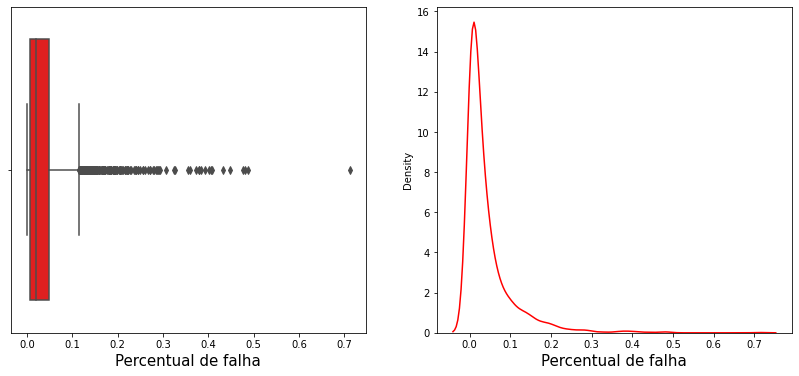

In [ ]:
# Gráfico do percentual de falha.
plt.figure(figsize = (14,6))
plt.subplot(121); sns.boxplot(data = df, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = df, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.show()

In [ ]:
df['Perc_Falha'].describe()

count    1954.000000
mean        0.042321
std         0.062601
min         0.000000
25%         0.006000
50%         0.019500
75%         0.049775
max         0.711800
Name: Perc_Falha, dtype: float64

Pode-se observar uma concentração maior de falhas entre 0% a 10%, sendo
a média igual a 4%. Entretanto, por conta da vasta presença de outliers a representação da média
não é ideal. Portanto, considerando a mediana, tem-se um percentual de falha em torno de 2%.


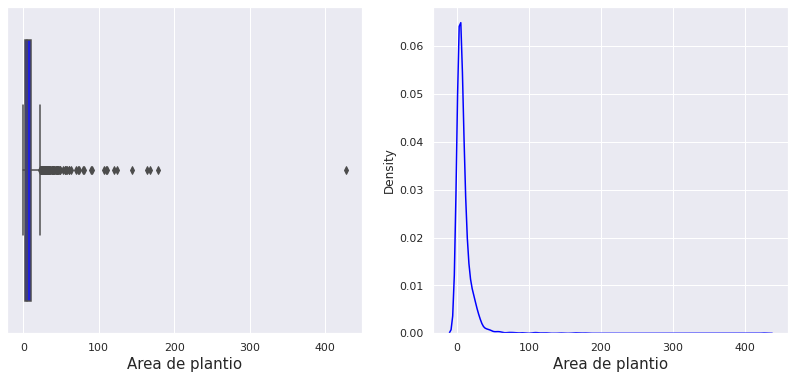

In [ ]:
# Tema dos gráficos
sns.set_theme(style = "darkgrid")

# Gráfico da área de plantio.
plt.figure(figsize = (14,6))
plt.subplot(121); sns.boxplot(data = df, x = "Area_Plantio", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = df, x = "Area_Plantio", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.show()

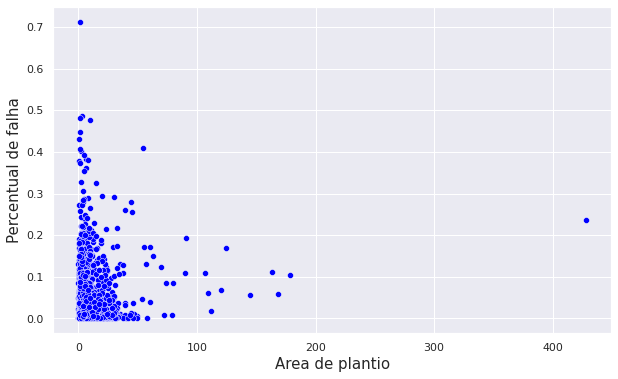

In [ ]:
# Gráfico da area do plantio vs percentual de falha.
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Area_Plantio", y = "Perc_Falha", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)
plt.show()

Nota-se que surpreendentemente não há uma correlação linear entre per-
centual de falha e área de plantio, o que era esperado pela equipe antes da análise.



In [ ]:
# Estudo da correlação entre as variáveis.
df.corr(method='spearman')

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Ambiente,Ph,Mo,...,Temp_Med,Temp_max,Temp_min,UR_med,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm
Area_Plantio,1.000000,0.028623,-0.079434,-0.002667,0.029399,0.040613,-0.016753,0.073953,-0.020443,-0.032087,...,0.022808,-0.021822,0.042341,0.118311,0.078145,0.115904,0.088232,0.069651,0.133158,0.037393
Perc_Falha,0.028623,1.000000,-0.036285,0.031198,0.023322,0.025484,0.152243,0.049944,-0.109051,0.029040,...,-0.064052,-0.081918,-0.063416,0.131975,0.130657,0.104277,0.091833,0.040596,0.177297,-0.011258
Perc_Infest_Inv,-0.079434,-0.036285,1.000000,-0.039159,0.144204,0.138449,0.152544,0.036718,0.055814,0.028524,...,-0.196427,-0.096709,-0.258031,-0.266306,-0.099177,-0.279340,-0.124968,-0.182838,-0.153406,-0.209369
CD_CLAS_DECL,-0.002667,0.031198,-0.039159,1.000000,0.050303,0.051892,0.056201,-0.084300,-0.052637,-0.057432,...,-0.108770,-0.137655,-0.047484,0.035409,0.077014,0.033266,-0.149589,0.031070,0.079091,-0.057860
QT_IDMIN_PLA,0.029399,0.023322,0.144204,0.050303,1.000000,0.975517,0.207585,-0.086196,0.100240,-0.040518,...,-0.068479,-0.060523,-0.064920,0.018602,0.049254,0.045830,-0.036963,0.130399,0.160487,0.035982
QT_IDMAX_PLA,0.040613,0.025484,0.138449,0.051892,0.975517,1.000000,0.199758,-0.076111,0.093904,-0.037313,...,-0.067360,-0.062702,-0.060839,0.018798,0.050544,0.047497,-0.021515,0.126026,0.154188,0.043783
CD_SIST_PLAN,-0.016753,0.152243,0.152544,0.056201,0.207585,0.199758,1.000000,0.010659,0.049113,-0.091349,...,-0.097597,-0.083647,-0.077009,-0.128773,-0.210369,-0.019002,0.175302,-0.139747,0.256667,0.011988
Ambiente,0.073953,0.049944,0.036718,-0.084300,-0.086196,-0.076111,0.010659,1.000000,-0.042185,-0.036652,...,-0.006546,-0.037503,0.011415,0.128736,0.139415,0.126499,0.049987,-0.155741,0.053385,-0.169321
Ph,-0.020443,-0.109051,0.055814,-0.052637,0.100240,0.093904,0.049113,-0.042185,1.000000,-0.033170,...,0.038027,0.077853,0.006401,-0.056555,0.035383,-0.066269,0.080316,0.015990,-0.090975,0.055133
Mo,-0.032087,0.029040,0.028524,-0.057432,-0.040518,-0.037313,-0.091349,-0.036652,-0.033170,1.000000,...,0.011076,0.015124,-0.026649,0.027520,0.134844,-0.039294,-0.045064,0.115809,-0.035094,0.000121


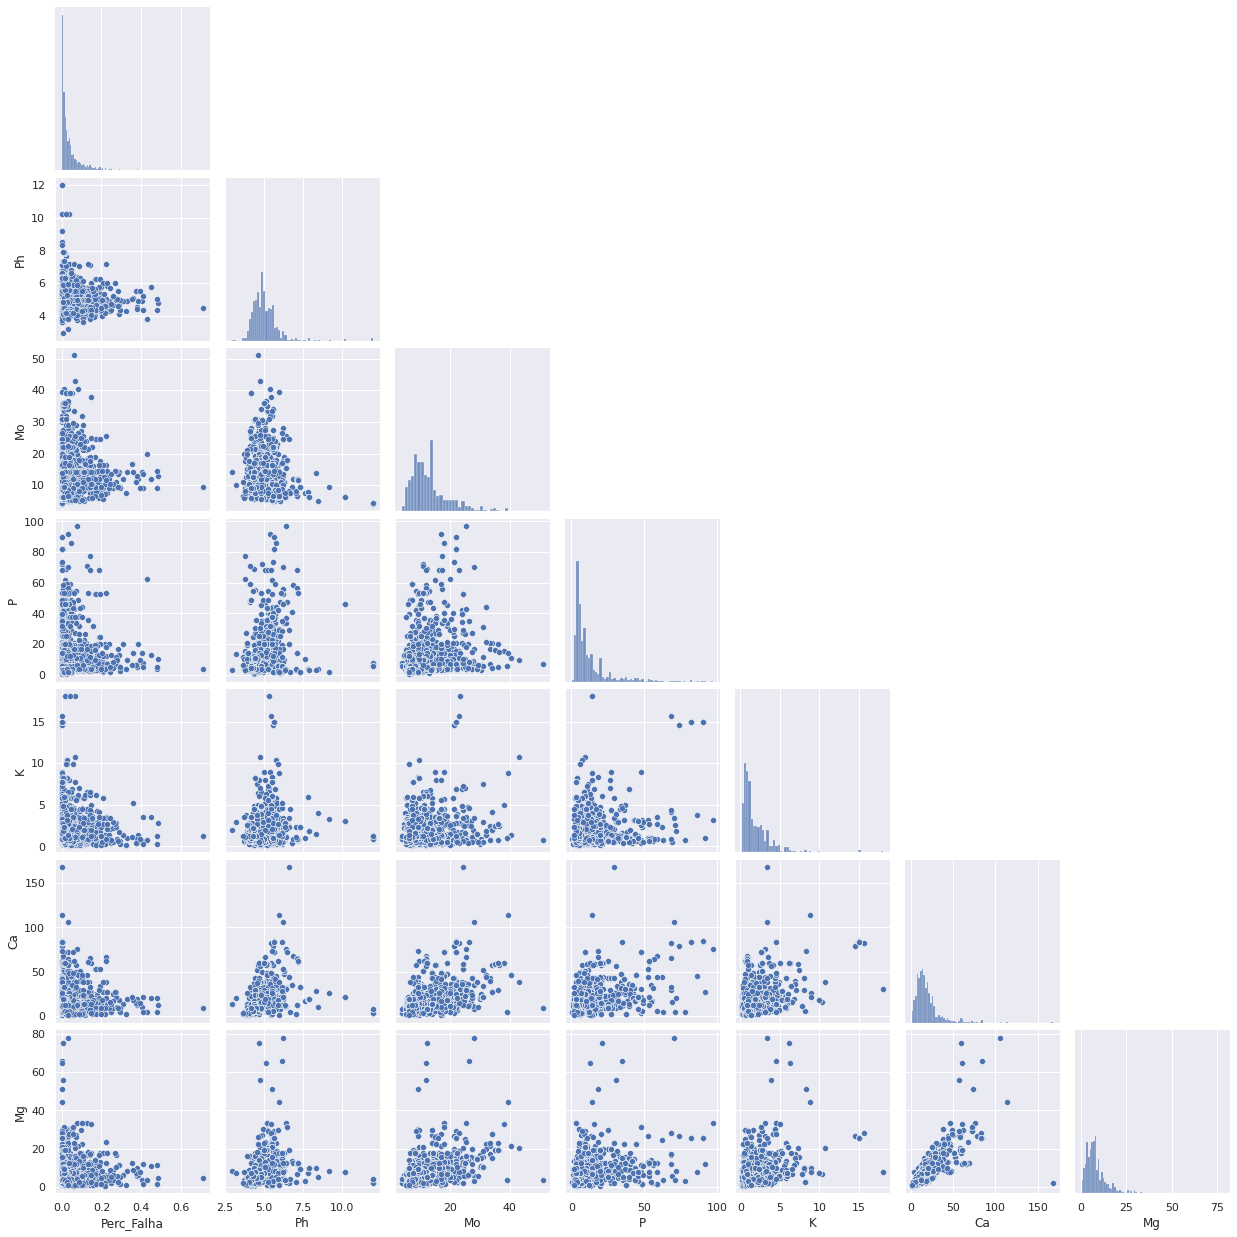

In [ ]:
# Gráfico PairPlot do percentual de falha com alguns minerais
sns.pairplot(data = df, vars = ["Perc_Falha", "Ph", "Mo", "P", "K", "Ca", "Mg"], corner = True)
plt.show()

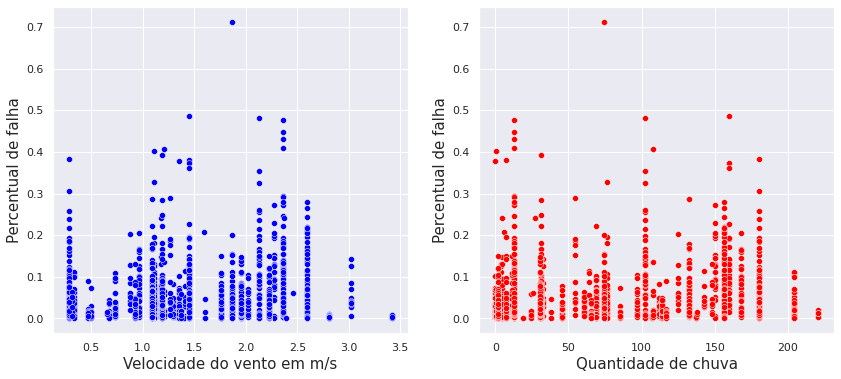

In [ ]:
# Gráficos do percentual de falha com velocidade do vento e percetual de falha com quantidade de chuva.
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "Vel_vento_ms", y = "Perc_Falha", color = "blue")
plt.xlabel("Velocidade do vento em m/s", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(122); sns.scatterplot(data = df, x = "Chuva", y = "Perc_Falha", color = "red")
plt.xlabel("Quantidade de chuva", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

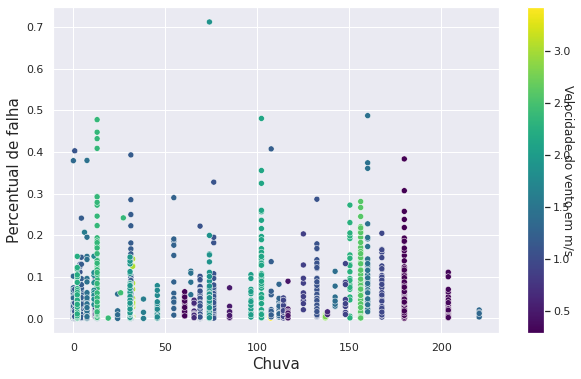

In [ ]:
# Gráfico do percentual de falha com velocidade do vento e quantidade de chuva.
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Chuva", y = "Perc_Falha", c = df["Vel_vento_ms"], cmap = 'viridis')
plt.xlabel("Chuva", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)
# Necessário normalizar os dados para plotar a barra de cor
norm = plt.Normalize(df['Vel_vento_ms'].min(), df['Vel_vento_ms'].max())
sm = plt.cm.ScalarMappable(cmap ="viridis", norm = norm)
sm.set_array([])
plt.colorbar(sm).set_label('Velocidade do vento em m/s', rotation = 270)
plt.show()

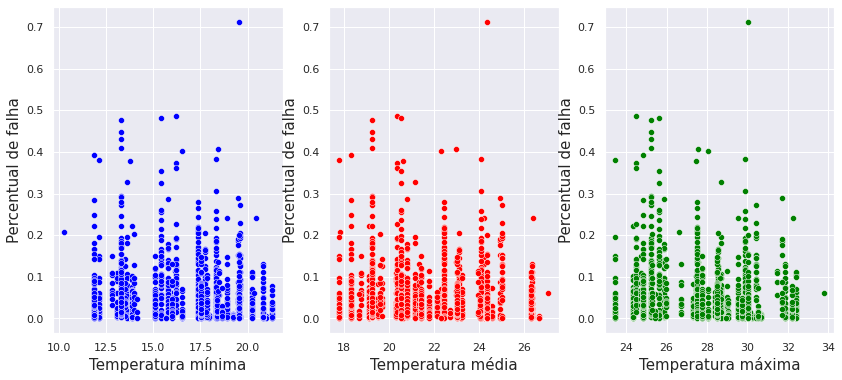

In [ ]:
# Gráficos das tempeturas com percentual de falha.
plt.figure(figsize = (14,6))

plt.subplot(131); sns.scatterplot(data = df, x = "Temp_min", y = "Perc_Falha", color = "blue")
plt.xlabel("Temperatura mínima", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(132); sns.scatterplot(data = df, x = "Temp_Med", y = "Perc_Falha", color = "red")
plt.xlabel("Temperatura média", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(133); sns.scatterplot(data = df, x = "Temp_max", y = "Perc_Falha", color = "green")
plt.xlabel("Temperatura máxima", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

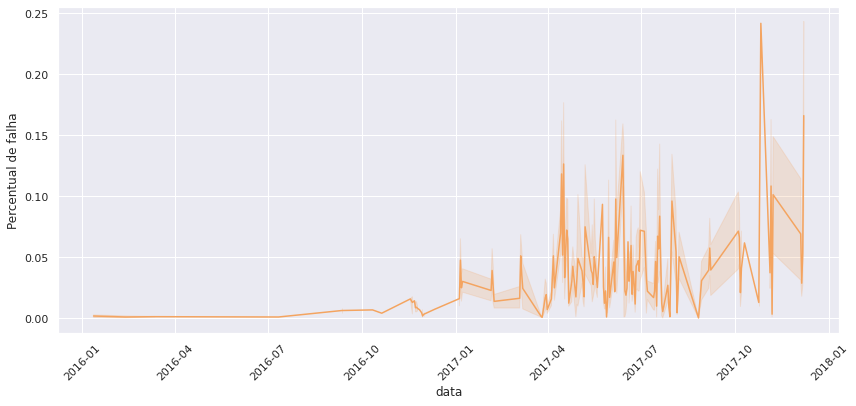

In [ ]:
# Série temporal do percentual de falha, de janeiro de 2016 a janeiro de 2018.
plt.figure(figsize = (14,6))
sns.lineplot(data = df, x = "data", y = "Perc_Falha", color = "sandybrown")
plt.xticks(rotation = 45)
plt.ylabel("Percentual de falha")
plt.show()

Verifica-se que os estudos foram realizados boa parte no período do ano de 2017 e não há uma sazonalidade aparente.

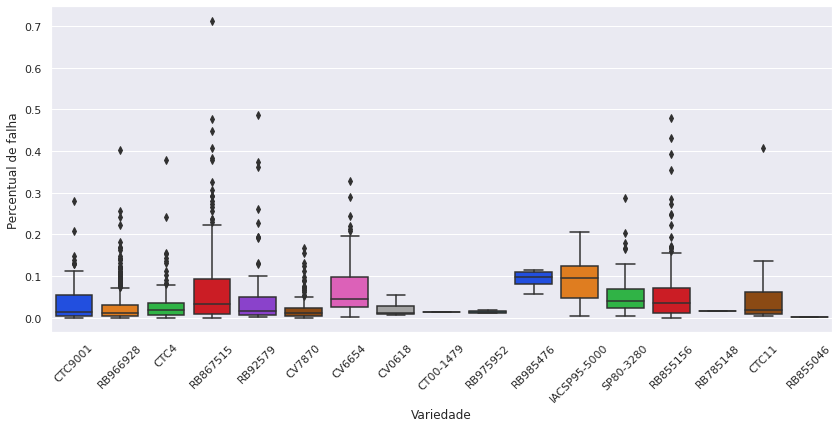

In [ ]:
# Box plot do percentual de falha em relação a variedade da cana de açucar.
plt.figure(figsize = (14,6))
sns.boxplot(data = df, x = "Variedade", y = "Perc_Falha", palette = "bright")
plt.xticks(rotation = 45)
plt.ylabel("Percentual de falha")
plt.show()

In [ ]:
# Frequencia das variadades presentes no dataset.
df["Variedade"].value_counts() 

RB966928        733
RB867515        363
RB855156        210
CTC4            165
CV6654           97
CV7870           92
CTC9001          91
RB92579          74
SP80-3280        62
IACSP95-5000     36
CTC11            11
CV0618            9
RB975952          4
RB985476          4
CT00-1479         1
RB785148          1
RB855046          1
Name: Variedade, dtype: int64

In [ ]:
# Criando um vetor com as frequencias de cada variedade e um vetor com as variedades
freq = []
for i in range(len(np.unique(df["Variedade"]))):
  freq.append(int(df["Variedade"].value_counts()[i]))

variedade = df['Variedade'].value_counts().index.tolist()

# Print de todas as frequencias e variedades
print(freq)
print(variedade)

# Juntando as frequencias menores em uma variedade denominada "outros"
aux = sum(freq[10:17])
freq = freq[0:10]
freq.append(aux)

variedade = variedade[0:10]
variedade.append('OUTROS')

print('\n')
print(freq)
print(variedade)

[733, 363, 210, 165, 97, 92, 91, 74, 62, 36, 11, 9, 4, 4, 1, 1, 1]
['RB966928', 'RB867515', 'RB855156', 'CTC4', 'CV6654', 'CV7870', 'CTC9001', 'RB92579', 'SP80-3280', 'IACSP95-5000', 'CTC11', 'CV0618', 'RB975952', 'RB985476', 'CT00-1479', 'RB785148', 'RB855046']


[733, 363, 210, 165, 97, 92, 91, 74, 62, 36, 31]
['RB966928', 'RB867515', 'RB855156', 'CTC4', 'CV6654', 'CV7870', 'CTC9001', 'RB92579', 'SP80-3280', 'IACSP95-5000', 'OUTROS']


A variedade 'RB966928' é a mais plantada no Brasil. Segundo o Censo, as variedades RB correspondem por 65% do plantio e da área total de cultivo dos estados de São Paulo e Mato Grosso do Sul.

A 'RB966928' é filha das variedades RB855156 x RB815690, foi desenvolvida pela Universidade Federal do Paraná. Apresenta elevado teor de sacarose.

fonte:
http://www.canaonline.com.br/conteudo/variedade-de-cana-rb966928-e-a-mais-plantada-no-brasil.html

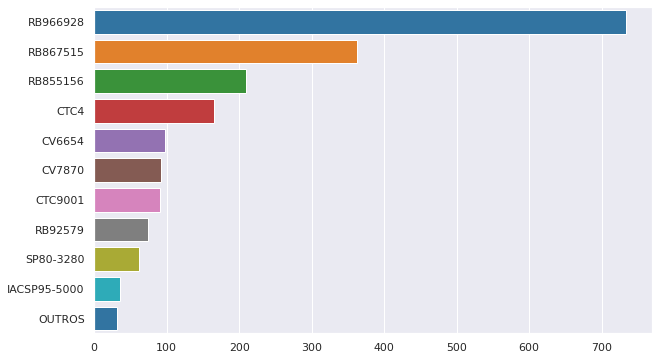

In [ ]:
# Gráfico de pizza das variedades de cana de açúcar
plt.figure(figsize = (10,6))
sns.barplot(x = freq, y = variedade, data = df, palette = "tab10")
plt.show()

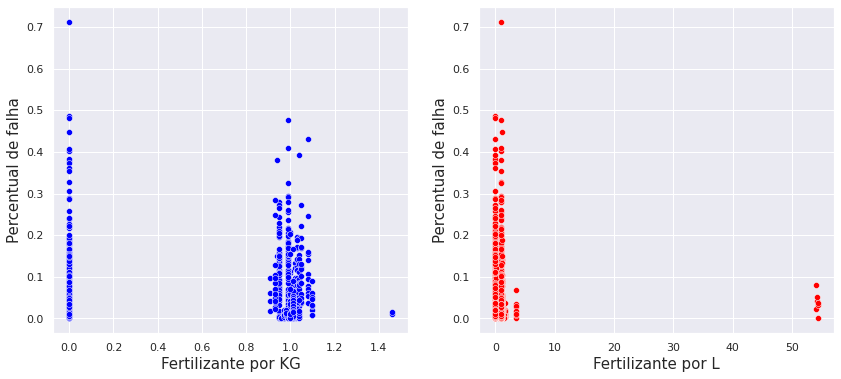

In [ ]:
# Gráficos dos fertilizantes com percentual de falha.
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "FERT_KG", y = "Perc_Falha", color = "blue")
plt.xlabel("Fertilizante por KG", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(122); sns.scatterplot(data = df, x = "FERT_L", y = "Perc_Falha", color = "red")
plt.xlabel("Fertilizante por L", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

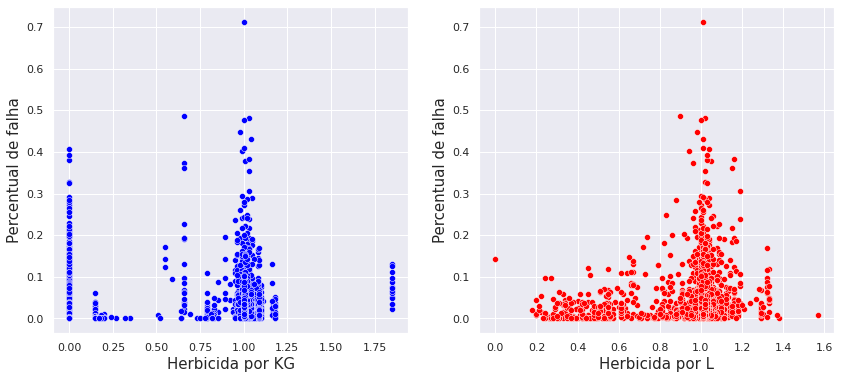

In [ ]:
# Gráficos dos herbecidas com percentual de falha.
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "HERB_KG", y = "Perc_Falha", color = "blue")
plt.xlabel("Herbicida por KG", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(122); sns.scatterplot(data = df, x = "HERB_L", y = "Perc_Falha", color = "red")
plt.xlabel("Herbicida por L", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

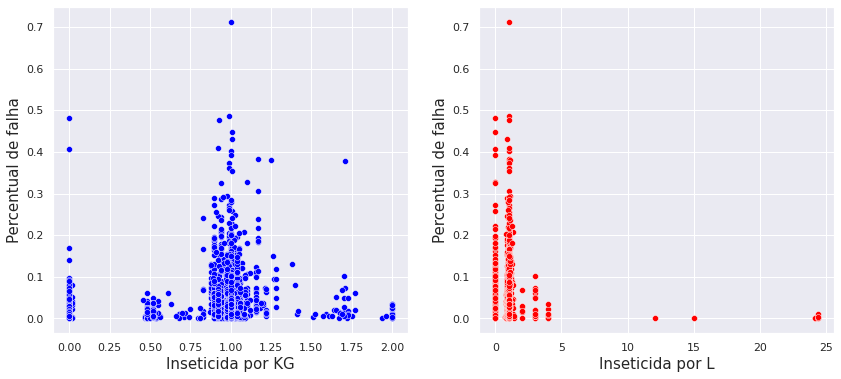

In [ ]:
# Gráficos dos inseticidas com percentual de falha.
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "INSET_KG", y = "Perc_Falha", color = "blue")
plt.xlabel("Inseticida por KG", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(122); sns.scatterplot(data = df, x = "INSET_L", y = "Perc_Falha", color = "red")
plt.xlabel("Inseticida por L", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

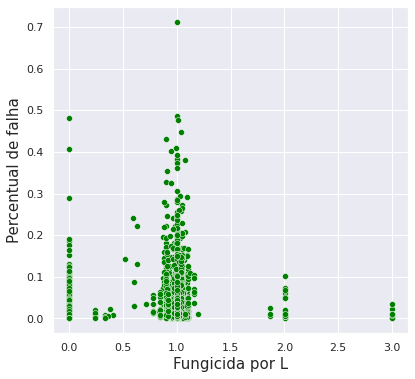

In [ ]:
# Gráficos dos fungicida com percentual de falha.
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "FUNG_L", y = "Perc_Falha", color = "green")
plt.xlabel("Fungicida por L", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

<Figure size 576x432 with 0 Axes>

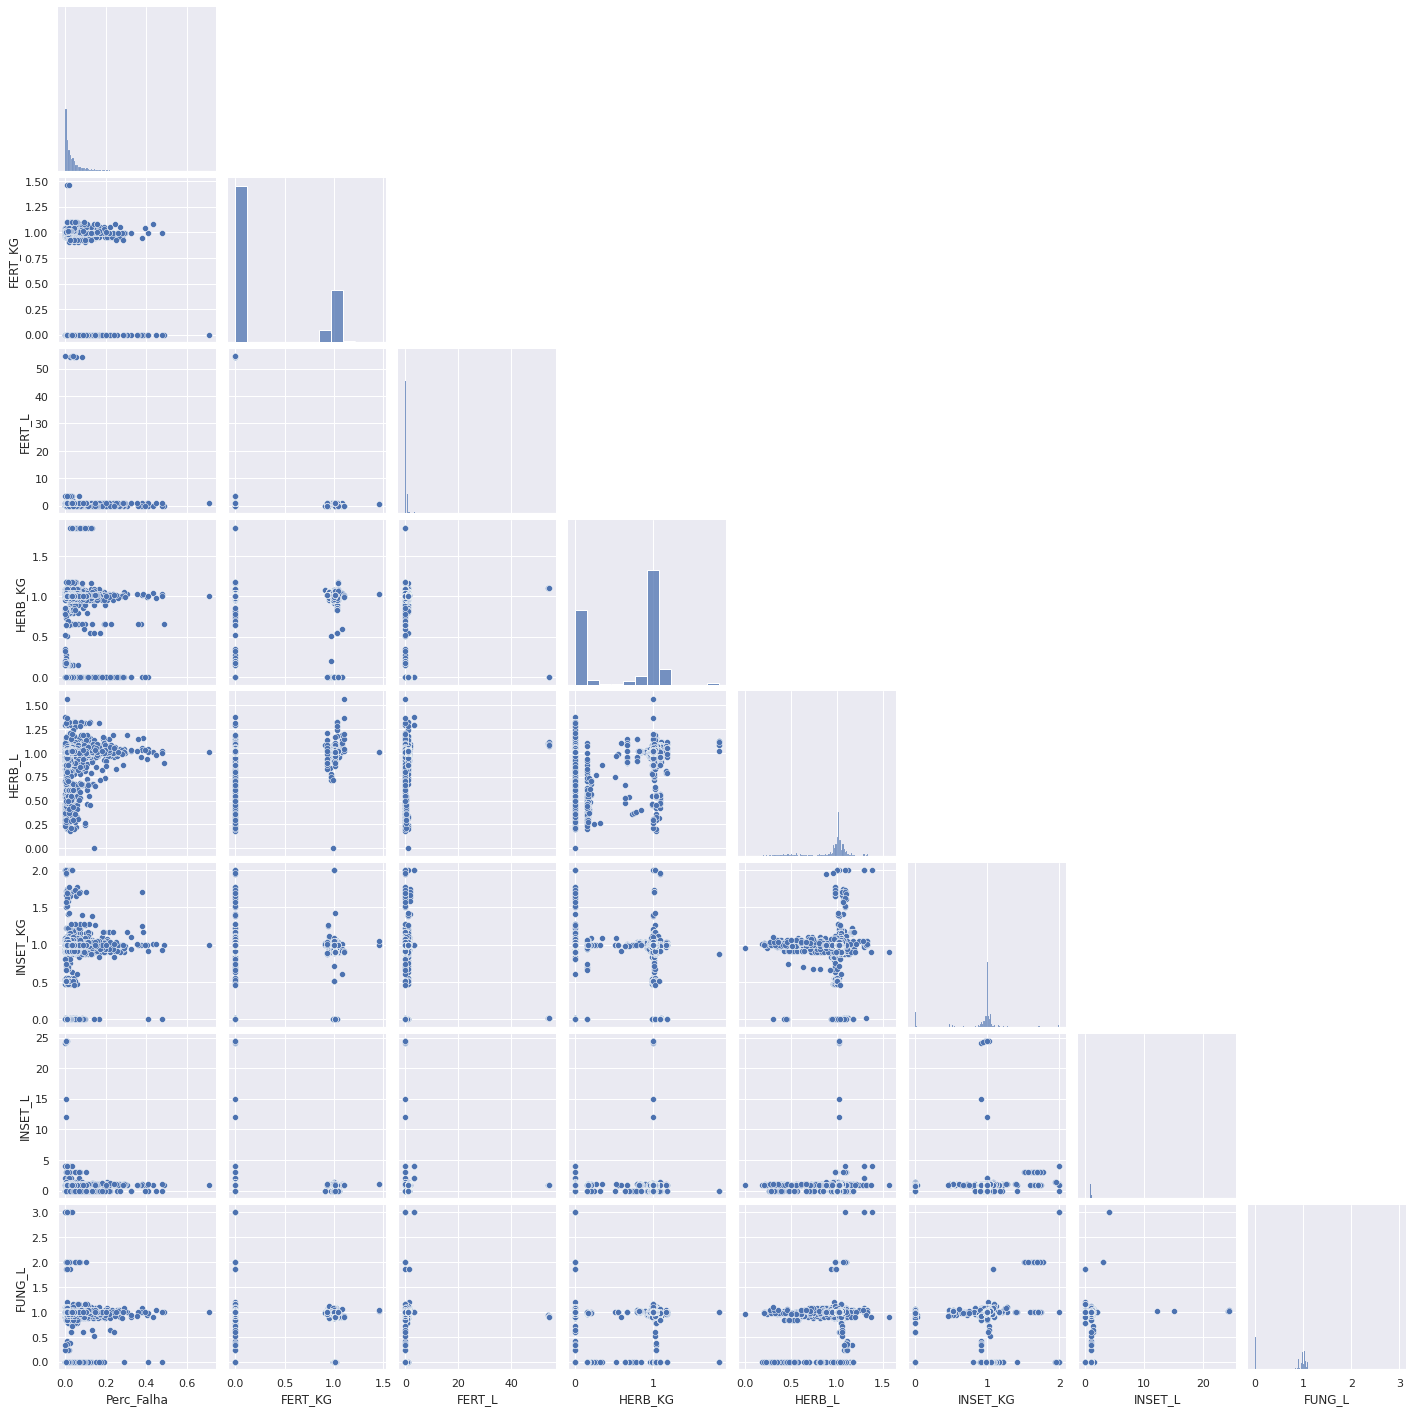

In [ ]:
# Gráfico PairPlot do percentual de falha com fertilizantes, herbicidas, insetividas e fungicidas.
plt.figure(figsize = (8,6))
sns.pairplot(data = df, vars = ["Perc_Falha", "FERT_KG", "FERT_L", "HERB_KG", "HERB_L", "INSET_KG", "INSET_L", "FUNG_L"], corner = True)
plt.show()

Observa-se a ausencia de correlação linear no percentual de falha com fertilizantes, herbicidas, insetividas, fungicidas e entre as mesmas.

---
# **3 - Engenharia de recursos**
---


Opta-se por agrupar os dados por fazenda e categoria de cana de açúcar para melhorar predições futuras.

In [ ]:
# Variáveis a serem excluidas para o agrupamento
df.drop(["Zona", "Talhao", "Estagio", "Ciclo", "Ambiente"], axis = 1, inplace = True)
df.head()

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Ph,Mo,...,Temp_min,UR_med,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,Fazenda,data
0,7.41,0.0014,0.0,1.0,5,13,2.0,CTC9001,5.00,14.0,...,20.995,74.265,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-01-12
1,4.14,0.0018,0.0,1.0,12,15,2.0,RB966928,3.85,12.5,...,20.995,74.265,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-02-12
2,9.32,0.0013,0.0,1.0,12,15,2.0,RB966928,5.00,14.0,...,20.995,74.265,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-03-12
3,5.78,0.0009,0.0,1.0,12,15,2.0,RB966928,5.00,14.0,...,20.995,74.265,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-02-12
4,1.63,0.0002,0.0,1.0,12,15,2.0,RB966928,3.90,14.0,...,20.995,74.265,95.44,53.095,1.4,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-01-12


In [ ]:
# Agrega as observações pelas fazendas presentes no dataset
aggregation_functions = {'Area_Plantio': 'mean',
                         'Perc_Falha': 'mean',
                         'Perc_Infest_Inv': 'mean',
                         'CD_CLAS_DECL': 'mean',
                         'QT_IDMIN_PLA': 'mean',
                         'QT_IDMAX_PLA': 'mean',
                         'CD_SIST_PLAN': 'mean',
                         'Ph': 'mean',
                         'Mo': 'mean',
                         'P': 'mean',
                         'K': 'mean',
                         'Ca': 'mean',
                         'Mg': 'mean',
                         'H_al': 'mean',
                         'Al': 'mean',
                         'S': 'mean',
                         'Sb': 'mean',
                         'Ctc': 'mean',
                         'V': 'mean',
                         'CORR_T': 'mean',
                         'FERT_KG': 'mean',
                         'FERT_L': 'mean',
                         'FUNG_L': 'mean',
                         'HERB_KG': 'mean',
                         'HERB_L': 'mean',
                         'INSET_KG': 'mean',
                         'INSET_L': 'mean',
                         'RESI_M3': 'mean',
                         'RESI_T': 'mean',
                         'Temp_Med': 'mean',
                         'Temp_max': 'max',
                         'Temp_min': 'min',
                         'UR_med': 'mean',
                         'UR_max': 'max',
                         'Ur_min': 'min',
                         'Vel_vento_ms': 'mean',
                         'Rad_Solar_MJm2': 'mean',
                         'Chuva': 'mean',
                         'EPT_mm': 'mean',}

df_fazenda = df.groupby([df['Fazenda'], df['Variedade']]).aggregate(aggregation_functions).reset_index()

# Dimensão do conjunto de dados
print("Número de observações: {}".format(df_fazenda.shape[0]), "\nNúmero de variáveis: {}".format(df_fazenda.shape[1]))

# Vizualização das cinco primeiras observações.
df_fazenda.head()

Número de observações: 116 
Número de variáveis: 41


,Fazenda,Variedade,Area_Plantio,Perc_Falha,Perc_Infest_Inv,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Ph,...,Temp_Med,Temp_max,Temp_min,UR_med,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm
0,0322c3a8233408bb5b9ac4ef87034d7c,CTC4,24.592857,0.059586,0.021714,1.0,12.0,15.0,2.0,5.221429,...,24.831429,31.850,18.900,78.892143,97.750,58.575,1.158571,15.894286,4.185714,101.014286
1,0322c3a8233408bb5b9ac4ef87034d7c,RB867515,18.133333,0.043200,0.048667,1.0,12.0,15.0,2.0,5.233333,...,24.230000,29.560,18.900,79.185000,97.395,60.980,1.180000,15.100000,4.400000,93.100000
2,070647c4f2c8d9cdf9a0232fa29aa638,CTC9001,6.754286,0.047748,0.000000,1.0,5.0,13.0,6.0,4.542857,...,22.991429,28.500,15.075,75.174286,93.485,45.585,1.956667,11.197619,30.166667,86.189286
3,0800d9195f0e5f1821ede4935f273ca0,CTC4,7.782632,0.027637,0.001721,1.0,12.0,15.0,6.0,7.221053,...,25.907105,32.215,19.525,77.460263,95.455,58.900,1.782105,14.873947,51.618421,111.581842
4,0d5d71b543a02f2b79e33b964a437c51,RB867515,6.712222,0.058061,0.061983,1.0,12.0,15.0,6.0,5.069444,...,24.100000,29.885,18.320,79.595000,98.285,60.900,0.285000,13.630000,179.900000,77.350000


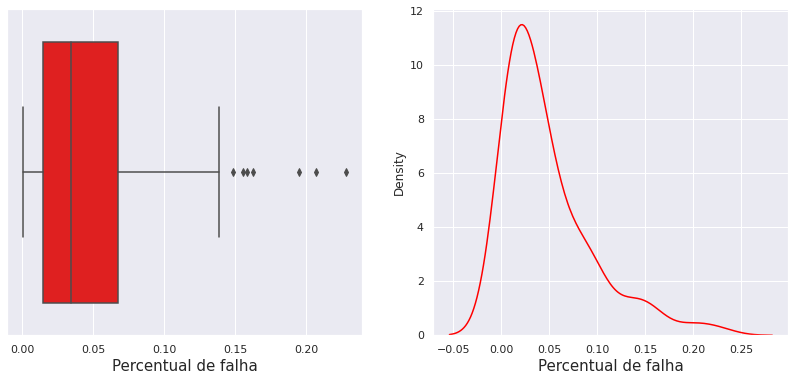

In [ ]:
# Gráfico do percentual de falha.
plt.figure(figsize = (14,6))
plt.subplot(121); sns.boxplot(data = df_fazenda, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = df_fazenda, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.show()

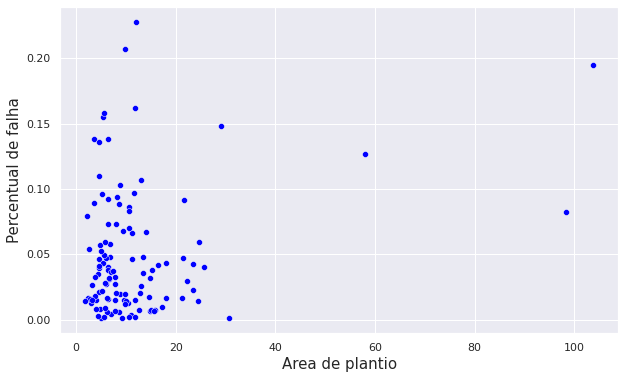

In [ ]:
# Gráfico da area do plantio vs percentual de falha.
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_fazenda, x = "Area_Plantio", y = "Perc_Falha", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)
plt.show()

Transformando variáveis númericas dos componentes do solo em categóricas.

In [ ]:
# Transforma as variáveis númericas dos minerais em categóricas.
minerais = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "Ctc", "V"]

for i in range(len(minerais)):
  df_fazenda[minerais[i]] = pd.cut(
      x = df_fazenda[minerais[i]],
      bins = [-np.inf, df_fazenda[minerais[i]].quantile(0.25), df_fazenda[minerais[i]].quantile(0.75), np.inf], # Separa em quartis
      labels = ["Abaixo", "Padrao", "Acima"])
  df_fazenda[minerais[i]] = df_fazenda[minerais[i]].astype('object')

# Um caso aparte, Enxofre (S).
df_fazenda["S"] = pd.cut(
    x = df_fazenda["S"],
    bins = [-np.inf, df_fazenda["S"].quantile(0.95), np.inf],
    labels = ["0","1"]
)
df_fazenda["S"] = df_fazenda["S"].astype('object')

O tratamento a parte do enxofre (S) se deve ao fato da alta presença de valores nulos, dessa forma, ao invés de dividir em quartis, opta-se em dividir pela presença ou não (0 ou 1) do elemento na amostra do solo coletada.

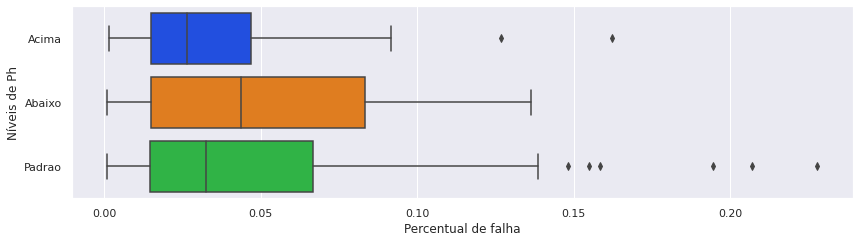

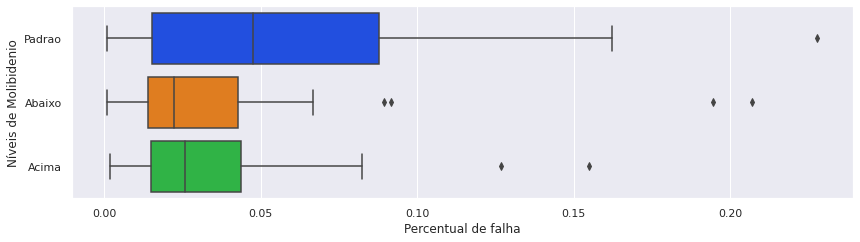

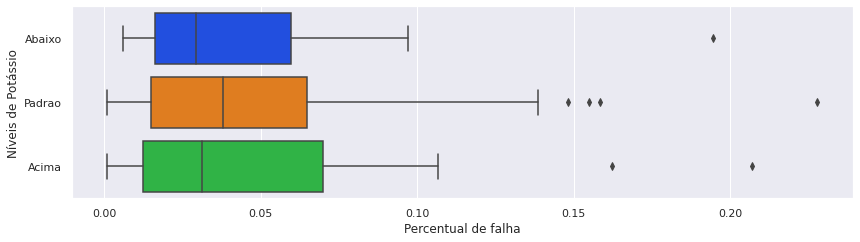

In [ ]:
# Box plot do percentual de falha em relação aos níveis de Ph, Mo e K.
plt.figure(figsize = (14,12))
plt.subplot(311); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Ph", palette = "bright")
plt.ylabel("Níveis de Ph", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,12))
plt.subplot(312); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Mo", palette = "bright")
plt.ylabel("Níveis de Molibidenio", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,12))
plt.subplot(313); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "K", palette = "bright")
plt.ylabel("Níveis de Potássio", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.show()

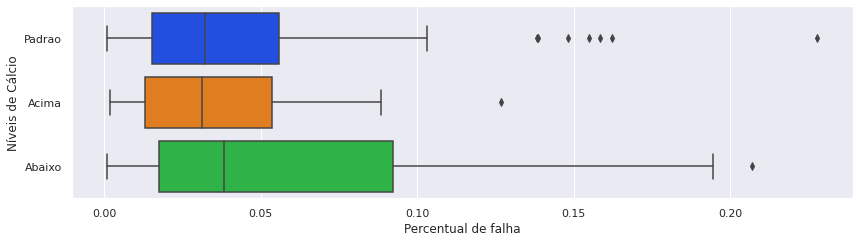

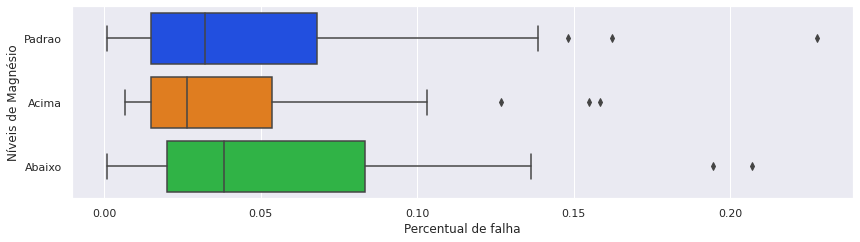

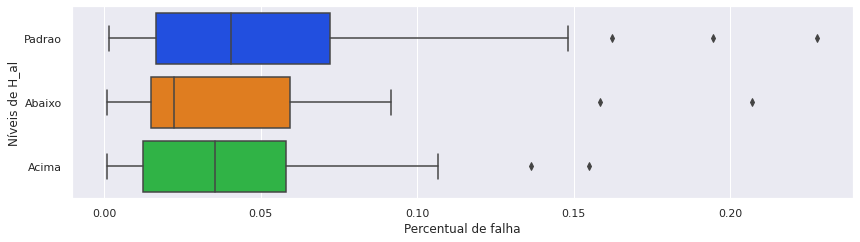

In [ ]:
# Box plot do percentual de falha em relação aos níveis de Ca, Mg e H_al.
plt.figure(figsize = (14,12))
plt.subplot(311); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Ca", palette = "bright")
plt.ylabel("Níveis de Cálcio", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,12))
plt.subplot(312); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Mg", palette = "bright")
plt.ylabel("Níveis de Magnésio", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,12))
plt.subplot(313); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "H_al", palette = "bright")
plt.ylabel("Níveis de H_al", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.show()

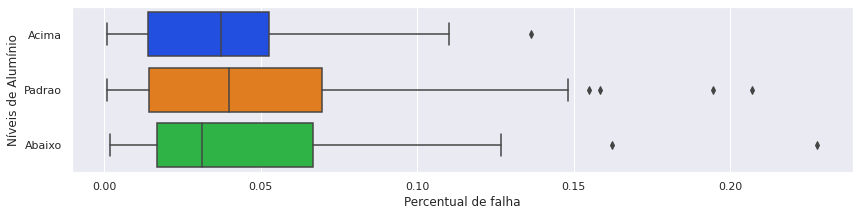

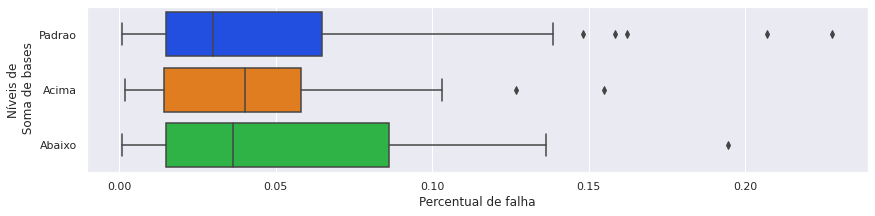

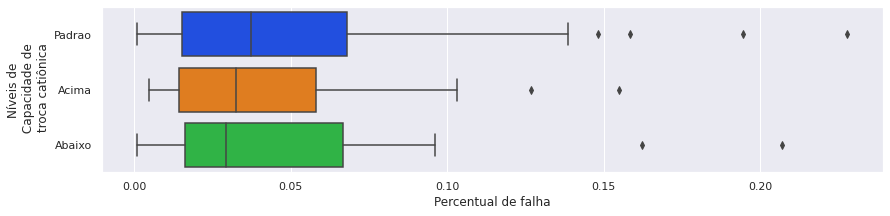

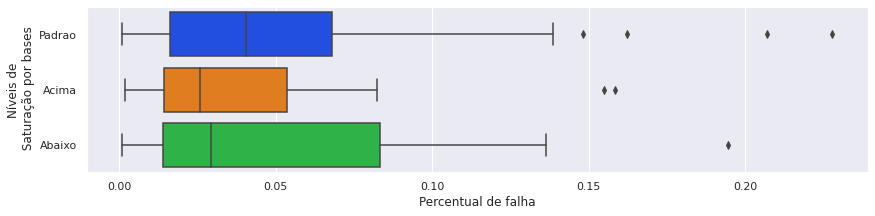

In [ ]:
# Box plot do percentual de falha em relação aos níveis de Al, Sb, Ctc e V.
plt.figure(figsize = (14,14))
plt.subplot(411); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Al", palette = "bright")
plt.ylabel("Níveis de Alumínio", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,14))
plt.subplot(412); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Sb", palette = "bright")
plt.ylabel("Níveis de\n Soma de bases", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,14))
plt.subplot(413); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "Ctc", palette = "bright")
plt.ylabel("Níveis de\n Capacidade de\n troca catiônica", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.figure(figsize = (14,14))
plt.subplot(414); sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "V", palette = "bright")
plt.ylabel("Níveis de\n Saturação por bases", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.show()

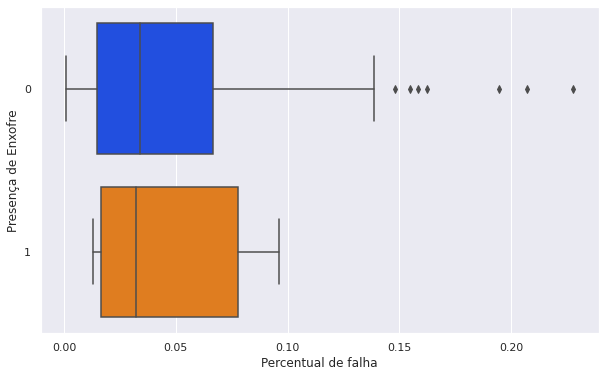

In [ ]:
# Box plot do percentual de falha em relação a presença de S.
plt.figure(figsize = (10,6))
sns.boxplot(data = df_fazenda, x = "Perc_Falha", y = "S", palette = "bright")
plt.ylabel("Presença de Enxofre", fontsize = 12)
plt.xlabel("Percentual de falha", fontsize = 12)

plt.show()

In [ ]:
# Arrendondando os valores que após o agrupamento passaram para float
aux = ["CD_SIST_PLAN", "QT_IDMIN_PLA", "QT_IDMAX_PLA", "CD_CLAS_DECL", "RESI_M3", "RESI_T"]

for x in range(len(aux)):
  df_fazenda[aux[x]] = round(df_fazenda[aux[x]])

df_fazenda = df_fazenda.astype({'CD_SIST_PLAN': 'int', 'QT_IDMIN_PLA': 'int', 'QT_IDMAX_PLA': 'int', "RESI_M3": 'int', "RESI_T": 'int'})

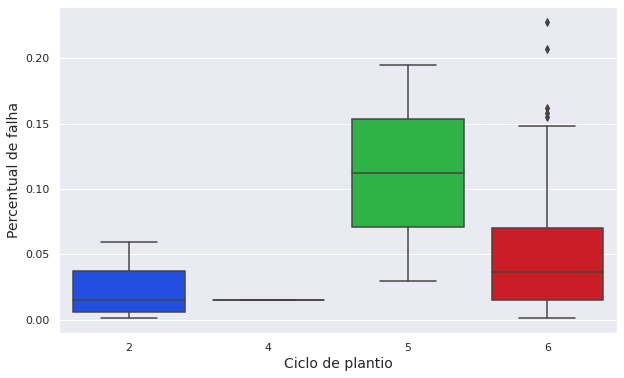

In [ ]:
# Box plot do percentual de falha em relação ao ciclo de plantio.
plt.figure(figsize = (10,6))
sns.boxplot(data = df_fazenda, x = "CD_SIST_PLAN", y = "Perc_Falha", palette = "bright")
plt.xlabel("Ciclo de plantio", fontsize = 14)
plt.ylabel("Percentual de falha", fontsize = 14)

plt.show()

---
# **4 - Construção de modelos e ajuste**
---

In [ ]:
import scipy.stats as sts

def arrumaNA(df, target):
    """Função que obtém um data frame e substitui valores NA pela mediana dos valores de acordo 
    com a variável resposta para variáveis numéricas e pela moda para variáveis categóricas.

    Parâmetros:
        df - data frame a ser arrumado.
        target - variável resposta.

    Retorno:
        df - data frame arrumado.
    """
    
    for col in [x for x in df.columns if x != target]:
        if (df[col].dtype != "object"): # Preenche com a mediana as variáveis numéricas
            mediana = df.groupby(target)[col].transform(np.median)
            df[col] = df[col].fillna(mediana)
        elif (df[col].dtype == "object"): # Preenche com a moda as variáveis categóricas
            moda = df.groupby(target)[col].agg(lambda x: pd.Series.mode(x)[0])
            moda = pd.merge(df, moda, on = target, how='left').iloc[:, -1]
            df[col] = df[col].fillna(moda[0])
    return df

##Classificação com PyCaret

Esse pacote está instalado no meu computador com a versão completa

Para versão online digite 

```
!pip install --pre pycaret
```
ou 
```
!pip install pycaret[full]
```


Classificação feita sem agrupar os dados, apenas realizando a transformação das variaveis de componente de solo

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 44 kB 1.7 MB/s 
     |████████████████████████████████| 62 kB 734 kB/s 
     |████████████████████████████████| 5.6 MB 44.3 MB/s 
     |████████████████████████████████| 1.6 MB 37.4 MB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 308 kB 10.6 MB/s 
     |████████████████████████████████| 11.9 MB 37.5 MB/s 
     |████████████████████████████████| 92 kB 119 kB/s 
     |████████████████████████████████| 100 kB 9.4 MB/s 
     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 1.3 MB 22.3 MB/s 
     |████████████████████████████████| 54.5 MB 1.1 MB/s 
     |████████████████████████████████| 76.6 MB 82 kB/s 
     |████████████████████████████████| 192.9 MB 68 kB/s 
     |████████████████████████████████| 305 

In [ ]:
df = pd.read_csv("/content/raizen_fazenda_zona_talhao.csv",sep = ';')
df.head()

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,dia,mes,ano,Fazenda,Zona,Talhao
0,8.72,0.0086,0.0,18M,1.0,12,15,6.0,RB855156,1o. Corte - 18 Meses,...,0.750,18.405,87.40,121.375,17,3,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,be3c152f6f6bcd5f85f9e4cba49b1e48
1,7.88,0.0280,0.0,18M,1.0,12,15,6.0,RB855156,Cana Planta - 18 m,...,1.100,15.220,62.35,98.150,23,7,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,9d08099943f8627959cfb8ecee0d2f5d
2,4.24,0.0014,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,1.100,13.955,58.70,69.660,11,7,2016,b5ccb3e35c52f544963d0754ca443df5,7d919225f11eb7af31bf9600b63a7a98,71db8a6cad03244e6e50f0ad8bc95a65
3,5.29,0.3009,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.465,10.480,119.70,54.700,28,5,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,06cd248dd1409b804444bd9ad5533d1d
4,3.49,0.0438,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.450,10.245,67.85,54.450,5,7,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,e03a89536262b6a0e2beabd90a841c43


In [ ]:
# Transformando as variáveis númericas dos minerais em categóricas.
minerais = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "Ctc", "V"]

for i in range(len(minerais)):
  df[minerais[i]] = pd.cut(
      x = df[minerais[i]],
      bins = [-np.inf, df[minerais[i]].quantile(0.25), df[minerais[i]].quantile(0.75), np.inf], # Separa em quartis
      labels = [0, 1, 2])

# Um caso aparte, Enxofre (S).
df["S"] = pd.cut(
    x = df["S"],
    bins = [-np.inf, df["S"].quantile(0.95), np.inf],
    labels = [0,1]
)

In [ ]:
# Criação da variavel target
falha = []
for i in range(df.shape[0]):
  if df['Perc_Falha'][i] <= 0.05:
    falha.append(0)
  else:
    falha.append(1)

df['Falha'] = falha

#Excluindo Percentual de Falha
exclusao = ["Perc_Falha"]
df.drop(exclusao, axis = 1, inplace = True)
df.head()

,Area_Plantio,Perc_Infest_Inv,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Ph,Mo,P,...,UR_med,UR_max,Ur_min,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,Fazenda,data,Falha
0,7.41,0.0,1.0,5,13,2.0,CTC9001,5.00,14.00,5.0,...,74.265,95.44,53.095,1.40,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-01-12,0
1,4.14,0.0,1.0,12,15,2.0,RB966928,3.85,12.50,27.0,...,74.265,95.44,53.095,1.40,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-02-12,0
2,9.32,0.0,1.0,12,15,2.0,RB966928,5.00,14.00,5.0,...,74.265,95.44,53.095,1.40,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-03-12,0
3,5.78,0.0,1.0,12,15,2.0,RB966928,5.00,14.00,5.0,...,74.265,95.44,53.095,1.40,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-02-12,0
4,1.63,0.0,1.0,12,15,2.0,RB966928,3.90,14.00,5.0,...,74.265,95.44,53.095,1.40,22.135,12.95,155.05,4f520a624fcf8896fb441028cb159edf,2016-01-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,1.07,0.0,1.0,12,15,6.0,RB966928,7.90,6.40,3.0,...,65.920,86.26,45.585,2.23,11.305,2.15,98.05,72dadffb85b38ae6adbbd43832449d77,2017-06-26,0
1950,3.81,0.0,1.0,12,15,6.0,RB966928,7.90,6.40,3.0,...,65.920,86.26,45.585,2.23,11.305,2.15,98.05,72dadffb85b38ae6adbbd43832449d77,2017-06-26,0
1951,4.35,0.0,1.0,12,15,6.0,RB966928,7.35,9.45,2.0,...,65.920,86.26,45.585,2.23,11.305,2.15,98.05,72dadffb85b38ae6adbbd43832449d77,2017-06-26,0
1952,8.72,0.0,1.0,12,15,6.0,RB966928,5.30,7.55,4.0,...,65.920,86.26,45.585,2.23,11.305,2.15,98.05,72dadffb85b38ae6adbbd43832449d77,2017-06-21,0


In [ ]:
y = df['Falha']
X = df.loc[:, df.columns != 'Falha']

# Aplica One Hot Encoding só nas variáveis respostas
X = pd.get_dummies(X)

# Separa em treino e teste mantendo a proporção de cada classe na base de treino e teste via stratity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, stratify = y)

In [ ]:
X_train_pycaret = X_train.copy()
X_test_pycaret = X_test.copy()

X_train_pycaret["Falha"] = y_train.values 
X_test_pycaret["Falha"] = y_test.values

Modelagem

In [ ]:
#substituimos os dados faltantes pela mediana
#10 fold
#Normalizamos os dados

from pycaret.classification import *
s = setup(data= X_train_pycaret, target = "Falha",
    numeric_imputation = "median",
    normalize = True,
    test_data = X_test_pycaret,
    session_id = 6405,
    fold = 10)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 21e7
INFO:logs:self.variable_keys: {'seed', '_is_multiclass', '_gpu_n_jobs_param', 'fold_generator', 'USI', 'y', 'fix_imbalance', 'display_container', 'X', '_ml_usecase', 'pipeline', 'y_test', 'n_jobs_param', 'variable_keys', 'exp_id', 'y_train', 'idx', 'target_param', '_all_models_internal', 'memory', 'X_train', '_all_metrics', 'fold_shuffle_param', 'fold_groups_param', '_available_plots', '_all_models', 'log_plots_param', 'master_model_container', 'exp_name_log', 'X_test', 'data', 'logging_param', 'html_param', 'gpu_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920

,Description,Value
0,Session id,6405
1,Target,Falha
2,Target type,Binary
3,Original data shape,"(1954, 141)"
4,Transformed data shape,"(1954, 142)"
5,Transformed train set shape,"(1465, 142)"
6,Transformed test set shape,"(489, 142)"
7,Numeric features,139
8,Date features,1
9,Rows with missing values,3.8%


INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:setup() successfully completed in 3.84s...............


In [ ]:
compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9e09534c90>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7f9e09534c90>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'Accuracy', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8423,0.8693,0.5665,0.7429,0.6390,0.5411,0.5515,0.4730
et,Extra Trees Classifier,0.8402,0.8708,0.6348,0.7017,0.6629,0.5591,0.5628,0.5280
ridge,Ridge Classifier,0.8328,0.0000,0.5398,0.7253,0.6146,0.5115,0.5231,0.0720
lda,Linear Discriminant Analysis,0.8293,0.8589,0.5507,0.7052,0.6149,0.5080,0.5165,0.2030
knn,K Neighbors Classifier,0.8286,0.8527,0.5968,0.6773,0.6302,0.5201,0.5246,0.2010
lr,Logistic Regression,0.8273,0.8664,0.5477,0.6983,0.6108,0.5023,0.5104,1.8020
gbc,Gradient Boosting Classifier,0.8259,0.8576,0.4516,0.7528,0.5612,0.4617,0.4868,1.2020
ada,Ada Boost Classifier,0.8109,0.8336,0.4789,0.6692,0.5563,0.4406,0.4517,0.4610
svm,SVM - Linear Kernel,0.8014,0.0000,0.5890,0.6132,0.5972,0.4660,0.4687,0.0910
dt,Decision Tree Classifier,0.7952,0.7343,0.6131,0.5869,0.5974,0.4606,0.4624,0.1250


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 3.7682056427001956e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9e09534c90>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7f9dea828b10>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully

INFO:logs:Creating metrics dataframe
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:DummyClassifier(constant=None, random_state=6405, strategy='prior')
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:Creating metrics dataframe
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9e09534c90>, estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6405, verbose=0, warm_start=False)

In [ ]:
#Criando um randon forrest
rf = create_model("rf")

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9e09534c90>, estimator=rf, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8776,0.9305,0.6757,0.8065,0.7353,0.6565,0.6608
1,0.8299,0.8823,0.4865,0.7500,0.5902,0.4889,0.5072
2,0.8435,0.8544,0.5676,0.7500,0.6462,0.5482,0.5569
3,0.8367,0.9049,0.6486,0.6857,0.6667,0.5587,0.5590
4,0.8503,0.9095,0.6757,0.7143,0.6944,0.5954,0.5958
5,0.8630,0.8673,0.5278,0.8636,0.6552,0.5758,0.6030
6,0.8288,0.8133,0.5833,0.6774,0.6269,0.5166,0.5190
7,0.8356,0.8376,0.5278,0.7308,0.6129,0.5120,0.5229
8,0.8082,0.8458,0.4167,0.6818,0.5172,0.4062,0.4253


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6405, verbose=0, warm_start=False)
INFO:logs:create_model() successfully completed......................................


In [ ]:
#Criando um LIGHT GBM
light = create_model("lightgbm")

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9dea914650>, estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6405, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() successfully completed......................................


Feature Importance

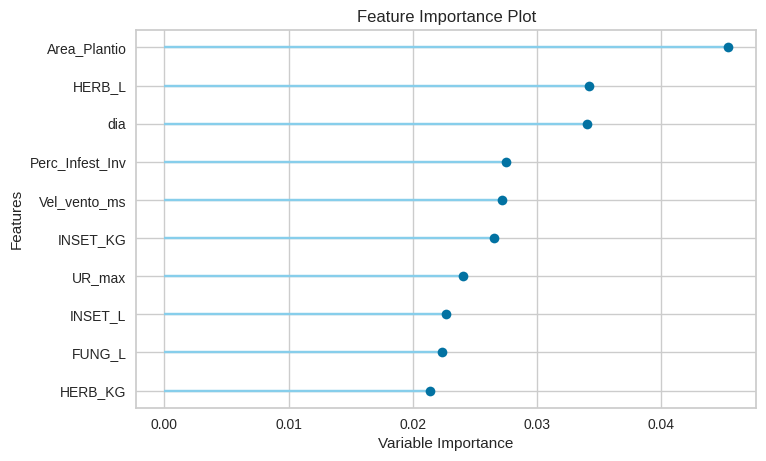

In [ ]:
#Feature Importance do Random Forest
plot_model(rf,plot = "feature")

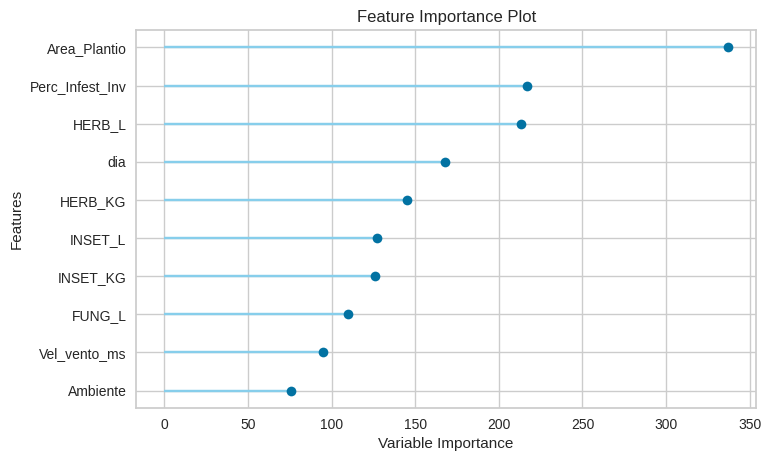

In [ ]:
#Feature importance do LightGBM
plot_model(light,plot = "feature")

Métricas nos dados de Teste

In [ ]:
modelos = [light,rf]
sigla = ["LightGBM","Random Forest"]

for modelo,sigla in zip(modelos,sigla):
    ypred = predict_model(modelo,data = X_test)
    res_test = [balanced_accuracy_score(y_test, ypred["Label"]),
                roc_auc_score(y_test, ypred["Label"]), f1_score(y_test, ypred["Label"], average = "weighted"),
                recall_score(y_test, ypred["Label"], average = "weighted"), precision_score(y_test, ypred["Label"], average = "weighted")]
    
    dic_results = {"teste":res_test}; DF = pd.DataFrame(dic_results).T; DF.columns = ["Bal. Acc.", "AUC",  "F1", "Rec.", "Prec."]
    print("Resultados modelo: {}".format(sigla))
    print(round(DF, 3), end = "\n\n")

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9dea914650>, estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6405, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, preprocess=True, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7f9ddbf298c0>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


INFO:logs:Set up data.
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f9dea914650>, estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6405, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, preprocess=True, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7f9ddbf298c0>)
INFO:logs:Checking exceptions
INFO:logs:Preloading l

Resultados modelo: LightGBM
       Bal. Acc.    AUC     F1   Rec.  Prec.
teste      0.731  0.731  0.813  0.818   0.81



INFO:logs:Set up data.


Resultados modelo: Random Forest
       Bal. Acc.    AUC     F1   Rec.  Prec.
teste      0.717  0.717  0.812  0.822  0.812



Avaliação do modelo

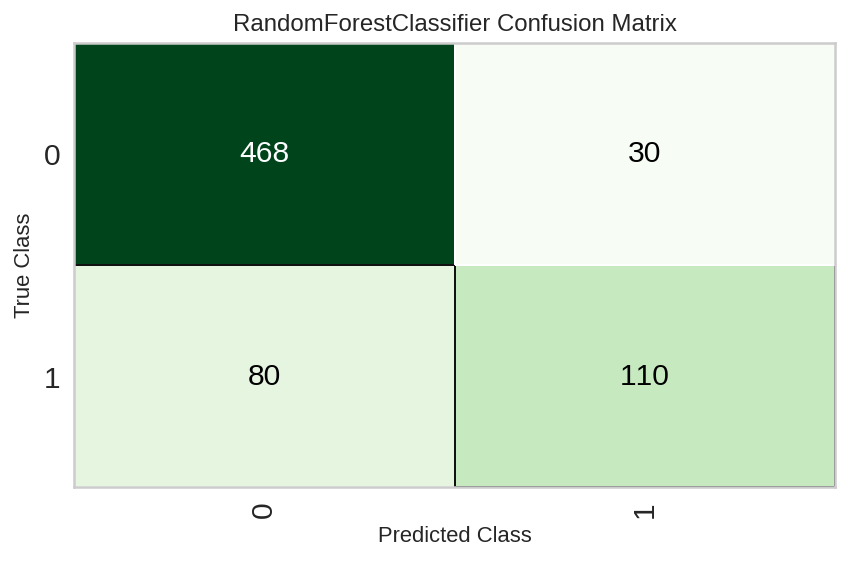

In [ ]:
plot_model(rf,scale = 2,plot = "confusion_matrix")

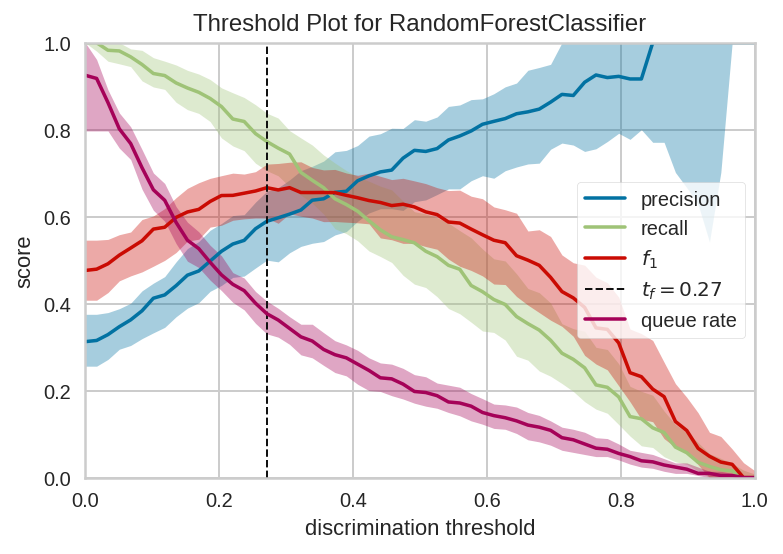

In [ ]:
plot_model(rf,scale = 2, plot = "threshold")

## Regressão Beta

Abordagens para o modelo beta:




1.   Dados sem agrupamento
2.   Dados sem agrupamento e transformação ln (1 + x)
3.   Dados agrupados por Fazenda e Variedade


**Todos os conjuntos de dados foram aplicadas transformações nas variaveis componentes de solo**



In [ ]:
!sudo apt-get install python3-pip
!pip install statsmodels==0.13.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dados sem agrupamento e excluindo Fazenda e Talhão

In [ ]:
#Leitura do conjunto de Dados
df = pd.read_csv("/content/raizen_fazenda_zona_talhao.csv",sep = ';')
df.head()

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,dia,mes,ano,Fazenda,Zona,Talhao
0,8.72,0.0086,0.0,18M,1.0,12,15,6.0,RB855156,1o. Corte - 18 Meses,...,0.750,18.405,87.40,121.375,17,3,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,be3c152f6f6bcd5f85f9e4cba49b1e48
1,7.88,0.0280,0.0,18M,1.0,12,15,6.0,RB855156,Cana Planta - 18 m,...,1.100,15.220,62.35,98.150,23,7,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,9d08099943f8627959cfb8ecee0d2f5d
2,4.24,0.0014,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,1.100,13.955,58.70,69.660,11,7,2016,b5ccb3e35c52f544963d0754ca443df5,7d919225f11eb7af31bf9600b63a7a98,71db8a6cad03244e6e50f0ad8bc95a65
3,5.29,0.3009,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.465,10.480,119.70,54.700,28,5,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,06cd248dd1409b804444bd9ad5533d1d
4,3.49,0.0438,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.450,10.245,67.85,54.450,5,7,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,e03a89536262b6a0e2beabd90a841c43


In [ ]:
# Transformando as variáveis númericas dos minerais em categóricas.
minerais = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "Ctc", "V"]

for i in range(len(minerais)):
  df[minerais[i]] = pd.cut(
      x = df[minerais[i]],
      bins = [-np.inf, df[minerais[i]].quantile(0.25), df[minerais[i]].quantile(0.75), np.inf], # Separa em quartis
      labels = ["baixo", "padrao", "Acima"])

# Um caso aparte, Enxofre (S).
df["S"] = pd.cut(
    x = df["S"],
    bins = [-np.inf, df["S"].quantile(0.95), np.inf],
    labels = ["nao","sim"]
)

In [ ]:
#Excluindo algumas variaveis que não vamos usar
exclusao = ["Fazenda", "Talhao"]
df.drop(exclusao, axis = 1, inplace = True)
df.drop(df.loc[df["Perc_Falha"]==0].index,inplace = True)

In [ ]:
#Label Encoder
categoricas = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "S","Ctc", "V","Zona","Variedade","Estagio","Ciclo"]
for coluna in categoricas:
  label_encoder = LabelEncoder()
  label_encoder.fit(df[coluna])

  df[coluna] = label_encoder.transform(df[coluna])

In [ ]:
#Dados faltantes
df.isnull().sum().sort_values(ascending = False).head()

CD_CLAS_DECL    88
Ambiente        32
FERT_KG         16
CD_SIST_PLAN     1
UR_med           0
dtype: int64

In [ ]:
#Substituindo dados faltantes pela mediana
faltantes = ["CD_SIST_PLAN","FERT_KG","Ambiente","CD_CLAS_DECL"]
for col in faltantes:
  mediana = df[col].median()
  df[col].fillna(mediana,inplace = True)

In [ ]:
#Separando em dados de Treino e Teste
X = df.drop(["Perc_Falha"],axis = 1)
X = sm.add_constant(X)
y = df["Perc_Falha"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33)

In [ ]:
#Resultados
modelo = BetaModel(y_train,X_train)
resultado1 = modelo.fit()
print(resultado1.summary())

                              BetaModel Results                               
Dep. Variable:             Perc_Falha   Log-Likelihood:                 4732.2
Model:                      BetaModel   AIC:                            -9368.
Method:            Maximum Likelihood   BIC:                            -9095.
Date:                Tue, 19 Jul 2022                                         
Time:                        21:01:31                                         
No. Observations:                2192                                         
Df Residuals:                    2144                                         
Df Model:                          47                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3689.8223    718.858     -5.133      0.000   -5098.758   -2280.886
Area_Plantio        0.0001      0.001

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
resultado1.pseudo_rsquared()

-0.03760259071436822

In [ ]:
#Métricas
print(f'EQM : {mean_squared_error(y_test,resultado1.predict(X_test))}')
print(f'EAM : {mean_absolute_error(y_test,resultado1.predict(X_test))}')
print(f'R² : {r2_score(y_test,resultado1.predict(X_test))}')


EQM : 0.004181593398221006
EAM : 0.04001890138397072
R² : 0.1778044953896435


### Aplicando Logaritmo e sem agrupar

In [ ]:
#Leitura do conjunto de Dados
df = pd.read_csv("/content/raizen_fazenda_zona_talhao.csv",sep = ';')

In [ ]:
# Transformando as variáveis númericas dos minerais em categóricas.
minerais = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "Ctc", "V"]

for i in range(len(minerais)):
  df[minerais[i]] = pd.cut(
      x = df[minerais[i]],
      bins = [-np.inf, df[minerais[i]].quantile(0.25), df[minerais[i]].quantile(0.75), np.inf], # Separa em quartis
      labels = ["baixo", "padrao", "Acima"])

# Um caso aparte, Enxofre (S).
df["S"] = pd.cut(
    x = df["S"],
    bins = [-np.inf, df["S"].quantile(0.95), np.inf],
    labels = ["nao","sim"]
)

In [ ]:
#Excluindo algumas variaveis que não vamos usar
exclusao = ["Fazenda", "Talhao"]
df.drop(exclusao, axis = 1, inplace = True)
df.drop(df.loc[df["Perc_Falha"]==0].index,inplace = True)

In [ ]:
#Label Encoder
categoricas = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "S","Ctc", "V","Zona","Variedade","Estagio","Ciclo"]
for coluna in categoricas:
  label_encoder = LabelEncoder()
  label_encoder.fit(df[coluna])

  df[coluna] = label_encoder.transform(df[coluna])

In [ ]:
#Dados faltantes
df.isnull().sum().sort_values(ascending = False).head()

CD_CLAS_DECL    88
Ambiente        32
FERT_KG         16
CD_SIST_PLAN     1
UR_med           0
dtype: int64

In [ ]:
#Substituindo dados faltantes pela mediana
faltantes = ["CD_SIST_PLAN","FERT_KG","Ambiente","CD_CLAS_DECL"]
for col in faltantes:
  mediana = df[col].median()
  df[col].fillna(mediana,inplace = True)

In [ ]:
#Aplicando Log (1 + x)
for colunas in df:
    df[colunas] = np.log1p(df[colunas])

In [ ]:
#Separando em dados de Treino e Teste
X = df.drop(["Perc_Falha"],axis = 1)
y = df["Perc_Falha"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33)

In [ ]:
#Resultados
modelo = BetaModel(y_train,X_train)
resultado1 = modelo.fit()
print(resultado1.summary())

                              BetaModel Results                               
Dep. Variable:             Perc_Falha   Log-Likelihood:                 4842.2
Model:                      BetaModel   AIC:                            -9592.
Method:            Maximum Likelihood   BIC:                            -9330.
Date:                Tue, 19 Jul 2022                                         
Time:                        21:02:35                                         
No. Observations:                2192                                         
Df Residuals:                    2145                                         
Df Model:                          46                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Area_Plantio       -0.0346      0.023     -1.488      0.137      -0.080       0.011
Perc_Infest_Inv     0.2192      0.307

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:2653: UserWarning: df_model + k_constant differs from nparams
  warnings.warn("df_model + k_constant differs from nparams")


In [ ]:
#Métricas
print(f'EQM : {mean_squared_error(y_test,resultado1.predict(X_test))}')
print(f'EAM : {mean_absolute_error(y_test,resultado1.predict(X_test))}')
print(f'R² : {r2_score(y_test,resultado1.predict(X_test))}')

EQM : 0.0032444518336478103
EAM : 0.03651603515806973
R² : 0.14046974112816202


In [ ]:
resultado1.pseudo_rsquared()

-0.03203867503276059

### Dados agrupados por Fazenda e Variedade

In [ ]:
#Leitura do conjunto de Dados
df = pd.read_csv("/content/raizen_fazenda_zona_talhao.csv",sep = ';')

In [ ]:
# Transformando as variáveis númericas dos minerais em categóricas.
minerais = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "Ctc", "V"]

for i in range(len(minerais)):
  df[minerais[i]] = pd.cut(
      x = df[minerais[i]],
      bins = [-np.inf, df[minerais[i]].quantile(0.25), df[minerais[i]].quantile(0.75), np.inf], # Separa em quartis
      labels = ["baixo", "padrao", "Acima"])

# Um caso aparte, Enxofre (S).
df["S"] = pd.cut(
    x = df["S"],
    bins = [-np.inf, df["S"].quantile(0.95), np.inf],
    labels = ["nao","sim"]
)

In [ ]:
#Label Encoder
categoricas = ["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "Sb", "S","Ctc", "V","Zona","Variedade","Estagio","Ciclo"]
for coluna in categoricas:
  label_encoder = LabelEncoder()
  label_encoder.fit(df[coluna])

  df[coluna] = label_encoder.transform(df[coluna])

In [ ]:
#Apaga as columas que não possibilitam o Aggregate do conjunto.

try:
    df.pop("Zona")
except:
    pass
try:
    df.pop("Talhao")
except:
    pass
try:
    df.pop("dia")
except:
    pass
try:
    df.pop("mes")
except:
    pass
try:
    df.pop("ano")
except:
    pass
try:
    df.pop("Estagio")
except:
    pass
try:
    df.pop("Ciclo")
except:
    pass
try:
    df.pop("Ambiente")
except:
    pass

In [ ]:
#Definindo as regras das colunas.
#   Exemplo: Área de plantio: Soma das áreas.
#            PH : Média dos índices.
aggregation_functions = {'Area_Plantio': 'sum',
                         'Perc_Falha': 'mean',
                         'Perc_Infest_Inv': 'mean',
                         'CD_CLAS_DECL': 'mean',
                         'QT_IDMIN_PLA': 'mean',
                         'QT_IDMAX_PLA': 'mean',
                         'CD_SIST_PLAN': 'mean',
                         'Ph': 'mean',
                         'Mo': 'mean',
                         'P': 'mean',
                         'K': 'mean',
                         'Ca': 'mean',
                         'Mg': 'mean',
                         'H_al': 'mean',
                         'Al': 'mean',
                         'S': 'mean',
                         'Sb': 'mean',
                         'Ctc': 'mean',
                         'V': 'mean',
                         'CORR_T': 'mean',
                         'FERT_KG': 'mean',
                         'FERT_L': 'mean',
                         'FUNG_L': 'mean',
                         'HERB_KG': 'mean',
                         'HERB_L': 'mean',
                         'INSET_KG': 'mean',
                         'INSET_L': 'mean',
                         'RESI_M3': 'mean',
                         'RESI_T': 'mean',
                         'Temp_Med': 'mean',
                         'Temp_max': 'max',
                         'Temp_min': 'min',
                         'UR_med': 'mean',
                         'UR_max': 'max',
                         'Ur_min': 'min',
                         'Vel_vento_ms': 'mean',
                         'Rad_Solar_MJm2': 'mean',
                         'Chuva': 'mean',
                         'EPT_mm': 'mean',}

#Agrupamento.
df_new = df.groupby(['Fazenda','Variedade']).aggregate(aggregation_functions).reset_index()

In [ ]:
#Removendo columas que não fazem sentido para o modelo.
df_model = df_new.loc[:, ~df_new.columns.isin(['Fazenda', 'Variedade',"CD_CLAS_DECL","FERT_KG"])]

In [ ]:
#Eliminando os dados exatamente com 0
df_model.drop(df_model.loc[df_model["Perc_Falha"]==0].index,inplace = True)

In [ ]:
X = df_model.drop(["Perc_Falha"],axis = 1)
X = sm.add_constant(X)
y = df_model["Perc_Falha"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
mod = BetaModel(y_train,X_train)
rslt = mod.fit()
print(rslt.summary())

                              BetaModel Results                               
Dep. Variable:             Perc_Falha   Log-Likelihood:                 520.34
Model:                      BetaModel   AIC:                            -964.7
Method:            Maximum Likelihood   BIC:                            -828.5
Date:                Wed, 20 Jul 2022                                         
Time:                        01:41:11                                         
No. Observations:                 266                                         
Df Residuals:                     228                                         
Df Model:                          37                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.2527      3.515     -2.917      0.004     -17.141      -3.364
Area_Plantio        0.0006      0.000

In [ ]:
#Métricas
print(f'EQM : {mean_squared_error(y_test,rslt.predict(X_test))}')
print(f'EAM : {mean_absolute_error(y_test,rslt.predict(X_test))}')
print(f'R² : {r2_score(y_test,rslt.predict(X_test))}')

EQM : 0.0036386023952585684
EAM : 0.043526278690498806
R² : -0.08160411166663062
